In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
data = pd.read_excel('1627801623_impact test data_AE451/New_charpy impact test data_AE451/Impact (48).xlsx')
data

,Pointn.,Time [ms],Displacement [mm],Energy [J],Force [N],Velocity [m/s],Voltage Ch 1 [mV]
0,1,0.00,0.000,0.000,0.000,3.260,-0.407819
1,2,0.01,0.033,0.005,289.919,3.260,0.332516
2,3,0.02,0.065,0.022,791.908,3.259,1.614392
3,4,0.03,0.098,0.055,1225.444,3.258,2.721466
4,5,0.04,0.130,0.101,1578.447,3.255,3.622892
...,...,...,...,...,...,...,...
4565,4566,45.65,128.637,-32.178,-558.362,4.861,-1.833648
4566,4567,45.66,128.686,-32.205,-557.691,4.862,-1.831935
4567,4568,45.67,128.735,-32.232,-558.362,4.863,-1.833648
4568,4569,45.68,128.783,-32.259,-555.678,4.864,-1.826794


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pointn.            4570 non-null   int64  
 1   Time [ms]          4570 non-null   float64
 2   Displacement [mm]  4570 non-null   float64
 3   Energy [J]         4570 non-null   float64
 4   Force [N]          4570 non-null   float64
 5   Velocity [m/s]     4570 non-null   float64
 6   Voltage Ch 1 [mV]  4570 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 250.0 KB


In [29]:
data['Time [s]'] = np.array(data['Time [ms]'])*0.001
data['Displacement [m]'] = np.array(data['Displacement [mm]'])*0.001

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pointn.            4570 non-null   int64  
 1   Time [ms]          4570 non-null   float64
 2   Displacement [mm]  4570 non-null   float64
 3   Energy [J]         4570 non-null   float64
 4   Force [N]          4570 non-null   float64
 5   Velocity [m/s]     4570 non-null   float64
 6   Voltage Ch 1 [mV]  4570 non-null   float64
 7   Time [s]           4570 non-null   float64
 8   Displacement [m]   4570 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 321.5 KB


In [31]:
px.line(data,x='Displacement [m]',y='Force [N]')

In [32]:
px.line(data,x='Time [s]',y='Force [N]')

In [33]:
px.line(data,x='Time [s]',y='Displacement [mm]')

In [34]:
px.line(data,x='Time [s]',y='Velocity [m/s]')

In [35]:
px.line(data,x='Time [s]', y= 'Energy [J]')

![equation](equations.PNG)
<!-- <img src = 'equations.PNG',style="align:center"> -->

In [59]:
# initial velocity
vi = 3.26

# initial displacement
di = 0

# Force array
F = np.array(data['Force [N]'])
# velocity array
V = np.array(data['Velocity [m/s]'])
# dispalcement array
D = np.array(data['Displacement [m]'])

# initialize velocity array
v = np.zeros(len(F))

# initialize displacement array
d = np.zeros(len(F))

# initialize energy arary
E_th = np.zeros(len(F))

# gravitational acceleration m/s^2
g = 9.81 

#  impactor mass kg
m = 6.14

# time
t = np.array(data['Time [s]'])
dt = 0.01

In [60]:
acceleration = np.array(len(F))
acceleration = g-F/m

In [61]:
from scipy.integrate import trapz,cumtrapz

In [62]:
F_integrated = cumtrapz(y= F,x = t,initial=0)/m
F_dbl_integrated  = cumtrapz(y = F_integrated,x =t, initial=0)

In [63]:

for i in range(0,len(F)):
    v[i] = vi + g*t[i] - (F_integrated[i])
    d[i] = (di + vi*t[i] + (g*np.power(t[i],2))/2 - (F_dbl_integrated[i]))

In [64]:
px.line(x = data['Time [s]'], y = acceleration)

Text(0.5, 1.0, 'Force vs Displacement Graph for Theoritical Data')

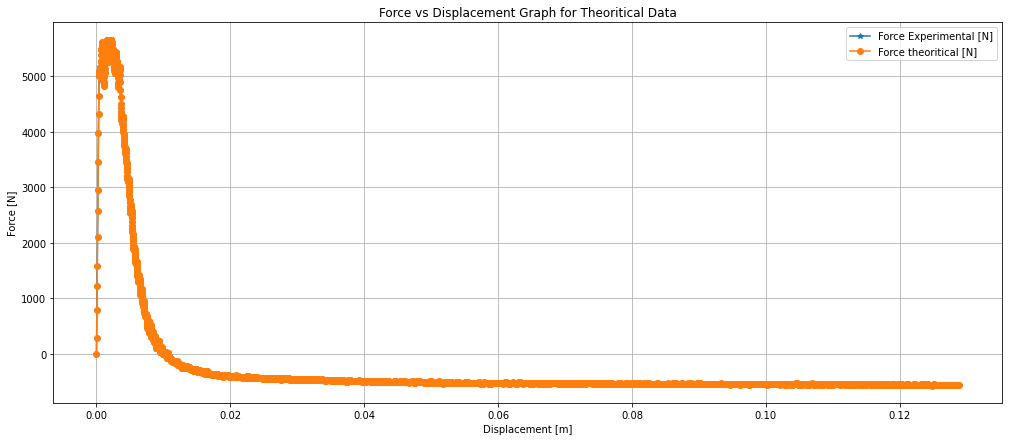

In [65]:
plt.figure(figsize=(17,7));
plt.grid('True');
plt.plot(D,F,'*-');
plt.plot(d,F,'o-');
plt.legend(['Force Experimental [N]','Force theoritical [N]']);
plt.ylabel('Force [N]');
plt.xlabel('Displacement [m]');
plt.title("Force vs Displacement Graph for Theoritical Data");


Text(0, 0.5, 'Displacement [m]')

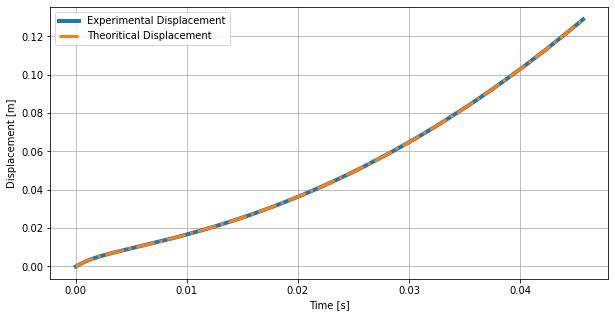

In [66]:
plt.figure(figsize=(10,5));
plt.grid('True');
plt.plot(t,D,'-',linewidth = 4)
plt.plot(t,d,'-.',linewidth = 3);
plt.legend(['Experimental Displacement','Theoritical Displacement']);
plt.xlabel('Time [s]');
plt.ylabel('Displacement [m]');


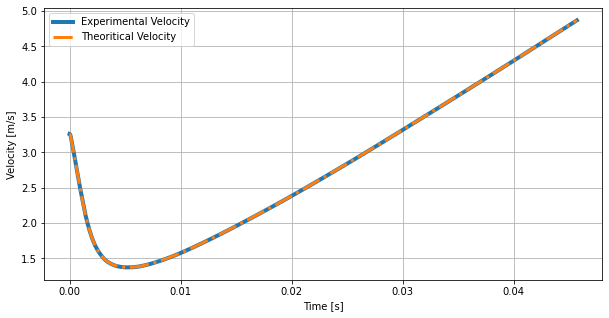

In [67]:
plt.figure(figsize=(10,5));
plt.grid('True');
plt.plot(t,V,'-',linewidth =4)
plt.plot(t,v,'-.',linewidth = 3);
plt.legend(['Experimental Velocity','Theoritical Velocity']);
plt.xlabel('Time [s]');
plt.ylabel('Velocity [m/s]');

In [68]:
E_th = cumtrapz(y=F,x=d,initial =0)

In [43]:
Energy_absorbed_exp = trapz(y=F,x=D)
Energy_absorbed_th = trapz(y=F,x= d)
Energy_absorbed_exp,Energy_absorbed_th

(-32.286905534499994, -32.28770022397316)

In [16]:
def error(exeperimental_data,theoritical_data):
    err = ((theoritical_data-exeperimental_data)/theoritical_data)*100
    return err

In [44]:
Velocity_Err = error(V,v)
Displacement_Err = error(D,d)

C:\Users\lakhi\AppData\Local\Temp/ipykernel_2080/728056001.py:2: RuntimeWarning:

invalid value encountered in true_divide



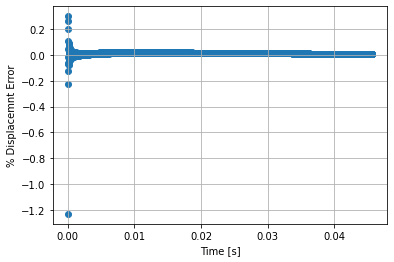

In [47]:
plt.grid('True');
plt.scatter(t,Displacement_Err);
plt.xlabel('Time [s]');
plt.ylabel('% Displacemnt Error');

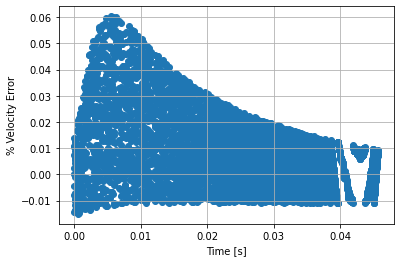

In [48]:
plt.grid();
plt.scatter(t,Velocity_Err);
plt.xlabel('Time [s]');
plt.ylabel('% Velocity Error');

In [70]:
Th_df = pd.DataFrame({
    'Pointn.' : data['Pointn.'],
    'Time [s]' : t,
    'Displacement_Th [m]'  : d,
    'Energy_Th [J]' : E_th,
    'Force [N]' : F,
    'Velocity_Th [m/s]' : v,
})

In [71]:
Th_df

,Pointn.,Time [s],Displacement_Th [m],Energy_Th [J],Force [N],Velocity_Th [m/s]
0,1,0.00000,0.000000,0.000000,0.000,3.260000
1,2,0.00001,0.000033,0.004726,289.919,3.259862
2,3,0.00002,0.000065,0.022356,791.908,3.259079
3,4,0.00003,0.000098,0.055222,1225.444,3.257534
4,5,0.00004,0.000130,0.100876,1578.447,3.255349
...,...,...,...,...,...,...
4565,4566,0.04565,0.128646,-32.179176,-558.362,4.861424
4566,4567,0.04566,0.128694,-32.206307,-557.691,4.862431
4567,4568,0.04567,0.128743,-32.233443,-558.362,4.863438
4568,4569,0.04568,0.128792,-32.260536,-555.678,4.864444


In [73]:
Energy_Err = np.array(len(F))
Energy_Err = error(data['Energy [J]'],Th_df['Energy_Th [J]'])

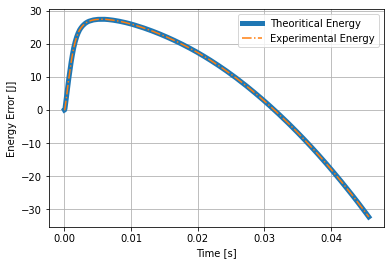

In [78]:
plt.grid();
plt.plot(data['Time [s]'],E_th,linewidth = 5);
plt.plot(data['Time [s]'],data['Energy [J]'],'-.');
plt.xlabel('Time [s]');
plt.ylabel('Energy Error [J]');
plt.legend(['Theoritical Energy','Experimental Energy']);

In [79]:
plt.grid('True');
plt.scatter(t,Energy_Err);
plt.xlabel('Time [s]');
plt.ylabel('% Energy Error');